# Capstone T5 Project PolluVision
----------------------------------

# Import Necessary Libraries¶

In [1]:
# import Necessary Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import os
from skimage.io import imread
import cv2

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read our csv files
df_train = pd.read_csv("/content/drive/MyDrive/Capstone2T5/draftV8Capstone/train_annotations.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Capstone2T5/draftV8Capstone/test_annotations.csv")
df_valid = pd.read_csv("/content/drive/MyDrive/Capstone2T5/draftV8Capstone/valid_annotations.csv")

In [4]:
df_train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,bad_billboard,236,221,350,266
1,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,garbage,342,434,364,455
2,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,garbage,617,522,635,539
3,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,sand_on_road,3,398,640,464
4,f42828478c8410159801768d3eb6818f_jpg.rf.3e2c28...,640,640,graffiti,98,73,210,188


In [5]:
df_train.shape

(20323, 8)

In [6]:
df_valid.shape

(1985, 8)

In [7]:
df_test.shape

(987, 8)

# We have 3 files: train, test, and valid. Each of them has 8 columns.

### 1: **File name:** contain the image name

### 2: **width:** measure image width

### 3: **height:** measure image height

### 4: **class:** contains the class to which the image belongs.

### 5: **xmin & ymin & xmax & ymax:** the bound box size

In [8]:
# create column before merge the 3 files
df_train['kind'] = 'train'
df_valid['kind'] = 'valid'
df_test['kind'] = 'test'

In [9]:
# Combine the DataFrames into one
combined_df = pd.concat([df_train, df_valid, df_test], ignore_index=True)

combined_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,kind
0,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,bad_billboard,236,221,350,266,train
1,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,garbage,342,434,364,455,train
2,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,garbage,617,522,635,539,train
3,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,sand_on_road,3,398,640,464,train
4,f42828478c8410159801768d3eb6818f_jpg.rf.3e2c28...,640,640,graffiti,98,73,210,188,train


In [10]:
combined_df.shape

(23295, 9)

In [11]:
# rename the column class to label
combined_df.rename(columns = {'class':'label', }, inplace = True)

In [12]:
# information about the file
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23295 entries, 0 to 23294
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  23295 non-null  object
 1   width     23295 non-null  int64 
 2   height    23295 non-null  int64 
 3   label     23295 non-null  object
 4   xmin      23295 non-null  int64 
 5   ymin      23295 non-null  int64 
 6   xmax      23295 non-null  int64 
 7   ymax      23295 non-null  int64 
 8   kind      23295 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.6+ MB


#  Data Visualization
-----------------------------------

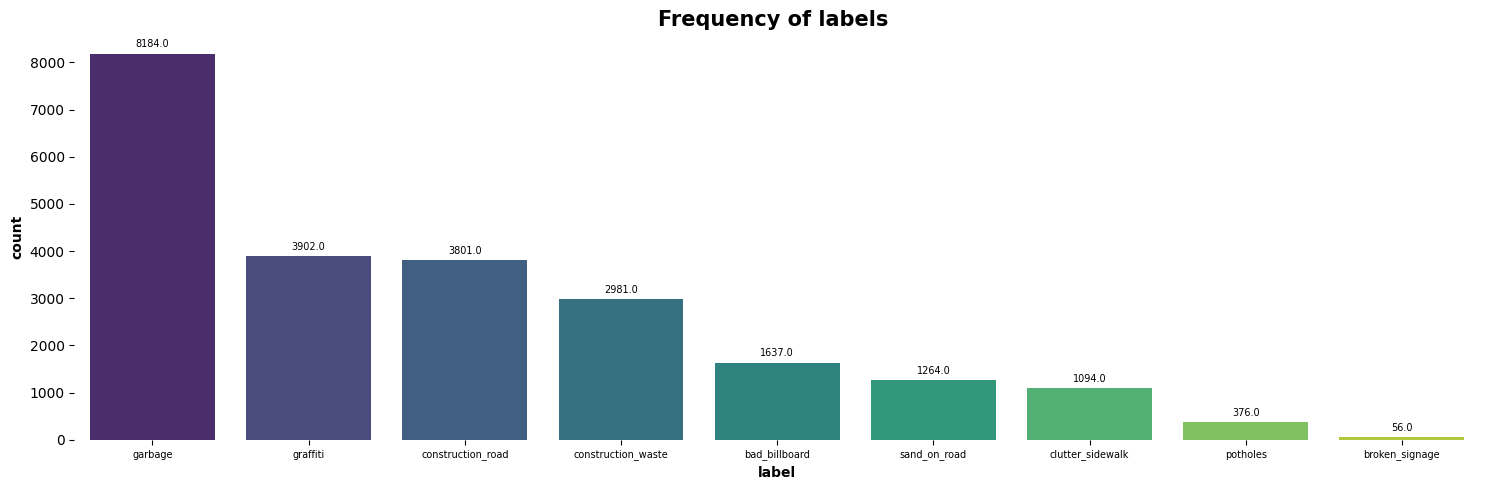

In [13]:

fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x='label', order = combined_df["label"].value_counts().index ,data=combined_df, palette = "viridis")

plt.xlabel('label', fontsize=10,  weight="bold" )
plt.ylabel('count',fontsize=10,  weight="bold")
plt.title ("Frequency of labels ",weight="bold", fontsize=15  )
plt.xticks(rotation=0, fontsize=7 )


# for showing value on chart int format
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',size=7)


sns.despine(left=True,bottom=True);
plt.tight_layout()
plt.grid(False)
plt.show()

In [14]:
# Combine the bpund box columns into a list
combined_df['bbox'] = combined_df[['xmin', 'ymin', 'xmax', 'ymax']].apply(lambda x: list(x), axis=1)

In [15]:
combined_df.head()

,filename,width,height,label,xmin,ymin,xmax,ymax,kind,bbox
0,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,bad_billboard,236,221,350,266,train,"[236, 221, 350, 266]"
1,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,garbage,342,434,364,455,train,"[342, 434, 364, 455]"
2,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,garbage,617,522,635,539,train,"[617, 522, 635, 539]"
3,6e866c1bc345e0fc9454fad2157150cd_jpg.rf.3e3c32...,640,640,sand_on_road,3,398,640,464,train,"[3, 398, 640, 464]"
4,f42828478c8410159801768d3eb6818f_jpg.rf.3e2c28...,640,640,graffiti,98,73,210,188,train,"[98, 73, 210, 188]"


# Visualize some images from train folder
----------------------------

In [17]:
directory = '/content/drive/MyDrive/Capstone2T5/draftV8Capstone/test'
file_list = os.listdir(directory)

In [18]:

images = []
for file in file_list:
    image = cv2.imread(os.path.join(directory, file))
    images.append(image)

In [19]:
len(images)

524

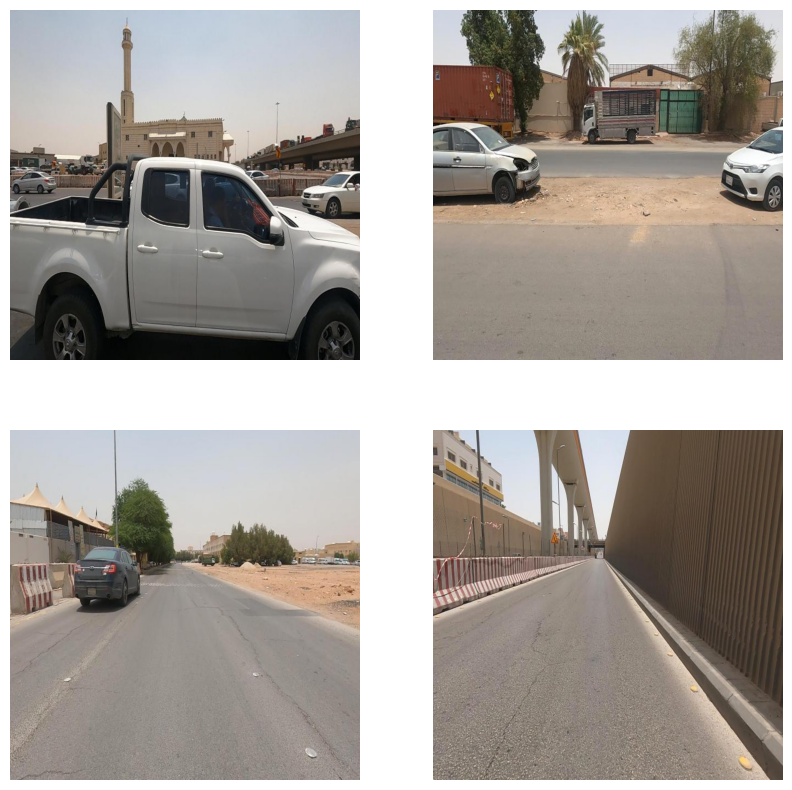

In [20]:
plt.figure(figsize=(10, 10))
for i in range(140, 144):  # Modify the range to select the desired images
    plt.subplot(2, 2, i - 139)  # Adjust the subplot index accordingly
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()